IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Yasmine AZIB - Ertugrul SEBUKHAN

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [41]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

#importation random
import random

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [43]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [44]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


Introduction : Analysons la base dans sa globalité

Boite1 : le nombre d'aliments dans chaque groupe alimentaire 

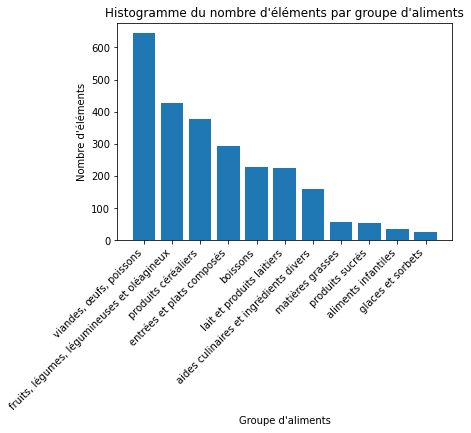

In [45]:
X=data_synthese['Groupe d\'aliment']
counts=X.value_counts()
plt.bar(counts.index, counts.values)
# Paramètres du graphique
plt.xlabel('Groupe d\'aliments')
plt.ylabel('Nombre d\'éléments')
plt.title('Histogramme du nombre d\'éléments par groupe d\'aliments')

plt.xticks(rotation=45, ha='right')
# Affichage du graphique
plt.show()


Boite 2 :  classement des groupes alimentaires par ordre croissant de danger environnemental

In [46]:
colonnes=["Changement climatique","Appauvrissement de la couche d'ozone","Particules fines"]
X_frame=data_synthese[data_synthese["DQR"]<=3]

groupes = np.unique(X_frame["Groupe d'aliment"])

l = []  # Initialisez la liste vide
l_moy= []

for i in range(len(groupes)):
    l.append(X_frame[X_frame["Groupe d'aliment"] == groupes[i]][colonnes])
    mini_frame_norm=clust.normalisation(l[i])
    l_moy.append((np.array(mini_frame_norm).mean(axis=1)).mean(axis=0))
    
    
    
indices_tries=np.argsort(np.array(l_moy))
print("Les groupes alimentaires par ordre croissant de danger environnemental:\n")
for nom, toxicite in zip(groupes[indices_tries], np.array(l_moy)[indices_tries]):
    print(f"{nom} - Toxicité moyenne : {toxicite:.2f}")



Les groupes alimentaires par ordre croissant de danger environnemental:

fruits, légumes, légumineuses et oléagineux - Toxicité moyenne : 0.06
entrées et plats composés - Toxicité moyenne : 0.14
boissons - Toxicité moyenne : 0.14
viandes, œufs, poissons - Toxicité moyenne : 0.22
aliments infantiles - Toxicité moyenne : 0.23
produits céréaliers - Toxicité moyenne : 0.25
aides culinaires et ingrédients divers - Toxicité moyenne : 0.25
lait et produits laitiers - Toxicité moyenne : 0.26
matières grasses - Toxicité moyenne : 0.28
produits sucrés - Toxicité moyenne : 0.50
glaces et sorbets - Toxicité moyenne : 0.50


Problématique 1 : De quelle façon composer un panier alimentaire en respectant l'écologie?

Pour répondre à cette question, nous allons dans un premier temps nous demander s'il est possible de mettre en évidence des clusters d'aliments en fonction de leur impact environnemental en utilisant des algorithmes d'apprentissage non-supervisé (K-means et CHA). Ensuite, nous analyserons les caractéristiques de chaque cluster pour séléctionner le plus éco-responsable( le moins polluant).
Pour ce faire, on exploite le fichier synthèse et on considère les indicateurs les plus fiables(Changement climatique, Appauvrissement de la couche d'ozone et Particules fines) et seulement les données dont le DQR est inférieur ou égale à 3 dans un souci de pertinence des données.

Partie 1/ CHA : Au vu de la complexité temporelle de cet algorithme, on se restreint à 50 élements tirés aleatoirement afin de mettre en avant le nombre de clusters trouvé par coupe du dendrogramme et choisir parmi ces groupes celui qui est le plus écologique

Boîte1 :  sélection de l'échantillonage et construction du dataframe

In [47]:
import scipy
import scipy.cluster.hierarchy as sc
colonnes=["Changement climatique","Appauvrissement de la couche d'ozone","Particules fines"]

# Sélection des lignes ayant un DQR inférieur ou égal à 3 et des colonnes spécifiées
X_frame=data_synthese[data_synthese["DQR"]<=3][colonnes]

#nombre d'échantillon
nb_sample=50
indices=random.sample(range(len(X_frame)),nb_sample)
print("indices:",indices)

#créer une correspondance entre les indices du dendrogramme et de la dataFrame
d=dict()
for i in range(len(indices)):
    d[i]=indices[i]

# Normalisation des données à partir des indices sélectionnés
X_sample_norm=clust.normalisation(X_frame.iloc[indices])



indices: [427, 992, 790, 1619, 339, 1498, 824, 1282, 247, 1756, 725, 1116, 560, 482, 1507, 309, 1722, 64, 1096, 1102, 569, 687, 468, 374, 1247, 392, 1708, 1377, 805, 1545, 222, 1242, 910, 1683, 402, 395, 956, 1330, 1212, 770, 749, 694, 224, 814, 709, 262, 1688, 1299, 577, 591]


Boites 2-3-4-5: construction et affichages des différents dendrogrammes

dend= [[16, 46, 0.0, 2], [20, 39, 0.001338123100134936, 2], [21, 51, 0.0017065768192107494, 3], [24, 48, 0.0018627169965077035, 2], [30, 47, 0.0024389591901129407, 2], [49, 54, 0.0024639587270650085, 3], [52, 53, 0.002774992247078609, 5], [13, 56, 0.0031585152835259646, 6], [28, 40, 0.003445704986633763, 2], [43, 55, 0.0034536242383306384, 4], [10, 37, 0.0036122280620620928, 2], [5, 18, 0.004826961187171145, 2], [33, 38, 0.005246477330496954, 2], [12, 58, 0.005274783789827812, 3], [57, 59, 0.005645491791172851, 10], [60, 63, 0.006159149201964728, 5], [2, 31, 0.007876411234379111, 2], [1, 11, 0.009535146770135967, 2], [64, 65, 0.009934022317465839, 15], [3, 50, 0.011378347699071194, 3], [7, 23, 0.011480447484343173, 2], [6, 44, 0.01530330168069168, 2], [17, 66, 0.015633651503946574, 3], [25, 70, 0.01565205137441063, 3], [19, 67, 0.019761732351319408, 3], [61, 73, 0.020560132122962146, 5], [62, 72, 0.021217749746924745, 5], [35, 71, 0.02289961886247238, 3], [68, 76, 0.026309791827321828,

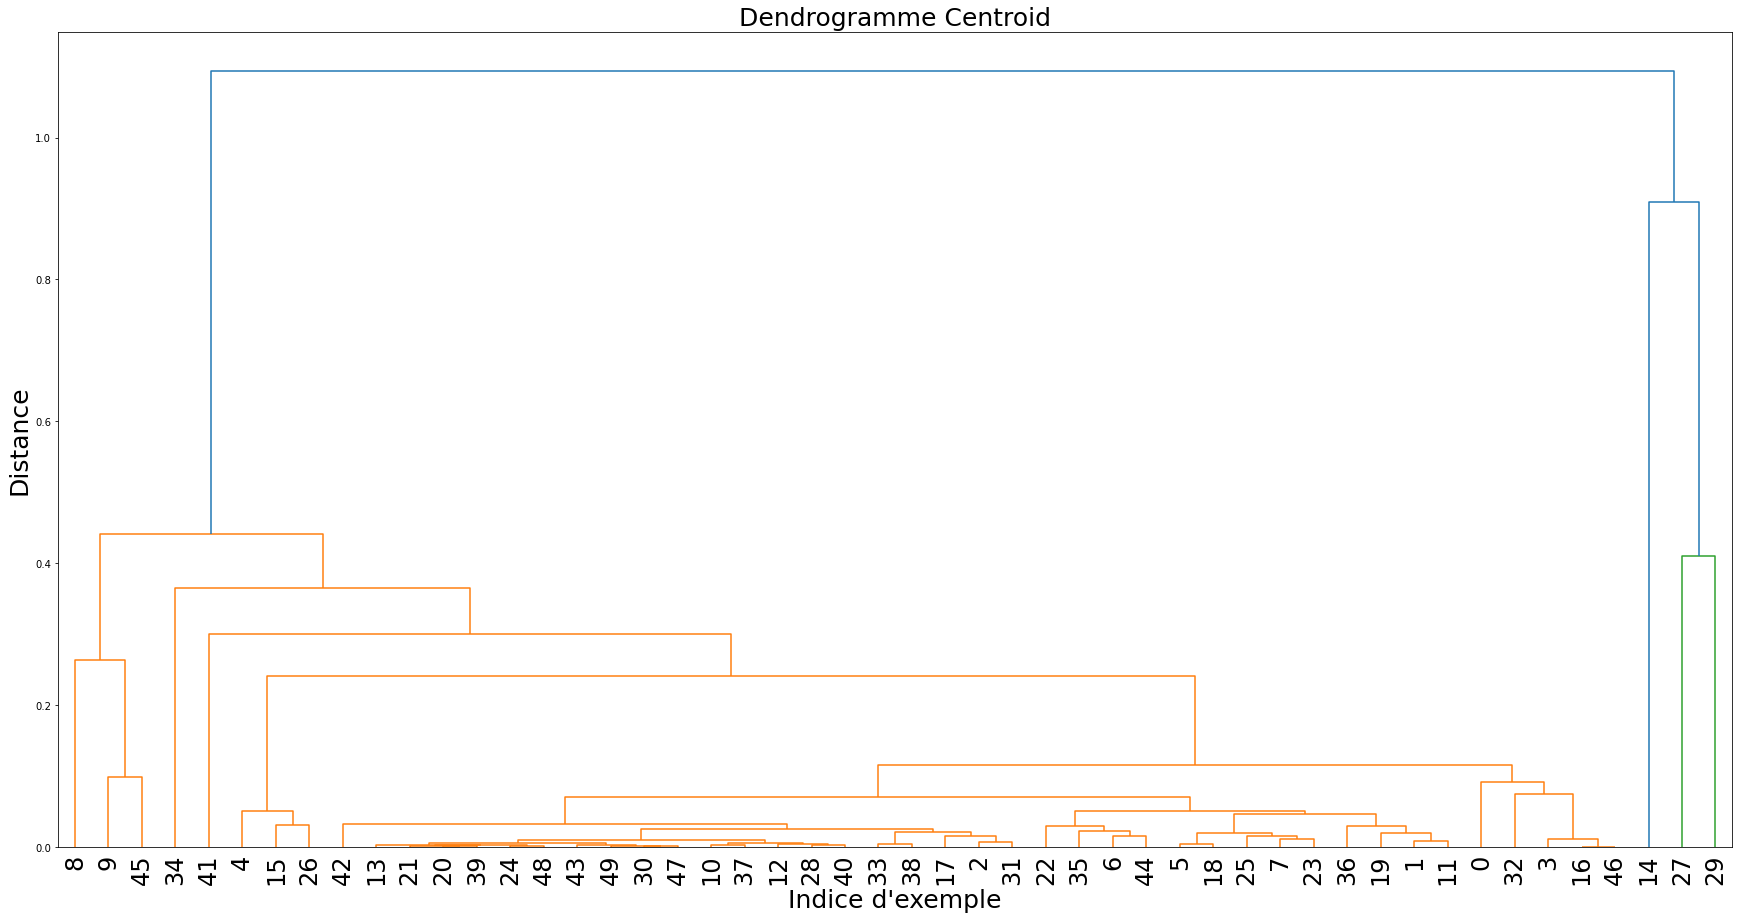

In [48]:
# Calcul du centroid CHA 
dend_centroid=clust.CHA_centroid(X_sample_norm)
print("dend=",dend_centroid)

# Paramètres de la fenêtre d'affichage
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme Centroid', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering
sc.dendrogram(
    dend_centroid, 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu
plt.show()


dend= [[16, 46, 0.0, 2], [20, 39, 0.001338123100134936, 2], [21, 51, 0.001781662021394125, 3], [24, 48, 0.0018627169965077033, 2], [30, 47, 0.0024389591901129407, 2], [49, 54, 0.00274470645547353, 3], [52, 53, 0.003044977811933143, 5], [28, 40, 0.003445704986633763, 2], [13, 56, 0.003503189166099618, 6], [10, 37, 0.0036122280620620923, 2], [43, 55, 0.0037097235952139236, 4], [5, 18, 0.004826961187171145, 2], [33, 38, 0.005246477330496954, 2], [12, 57, 0.005543785156262649, 3], [60, 58, 0.006004348695522282, 10], [59, 63, 0.00680337635076454, 5], [2, 31, 0.007876411234379111, 2], [1, 11, 0.009535146770135967, 2], [65, 64, 0.010826729307618093, 15], [3, 50, 0.011378347699071194, 3], [7, 23, 0.011480447484343173, 2], [6, 44, 0.01530330168069168, 2], [17, 66, 0.016014526059405607, 3], [25, 70, 0.016667484156700496, 3], [19, 67, 0.020215239170231263, 3], [61, 73, 0.021401975206998335, 5], [68, 72, 0.021930933839364567, 18], [35, 71, 0.02403042450312034, 3], [62, 75, 0.026903288902038268, 7]

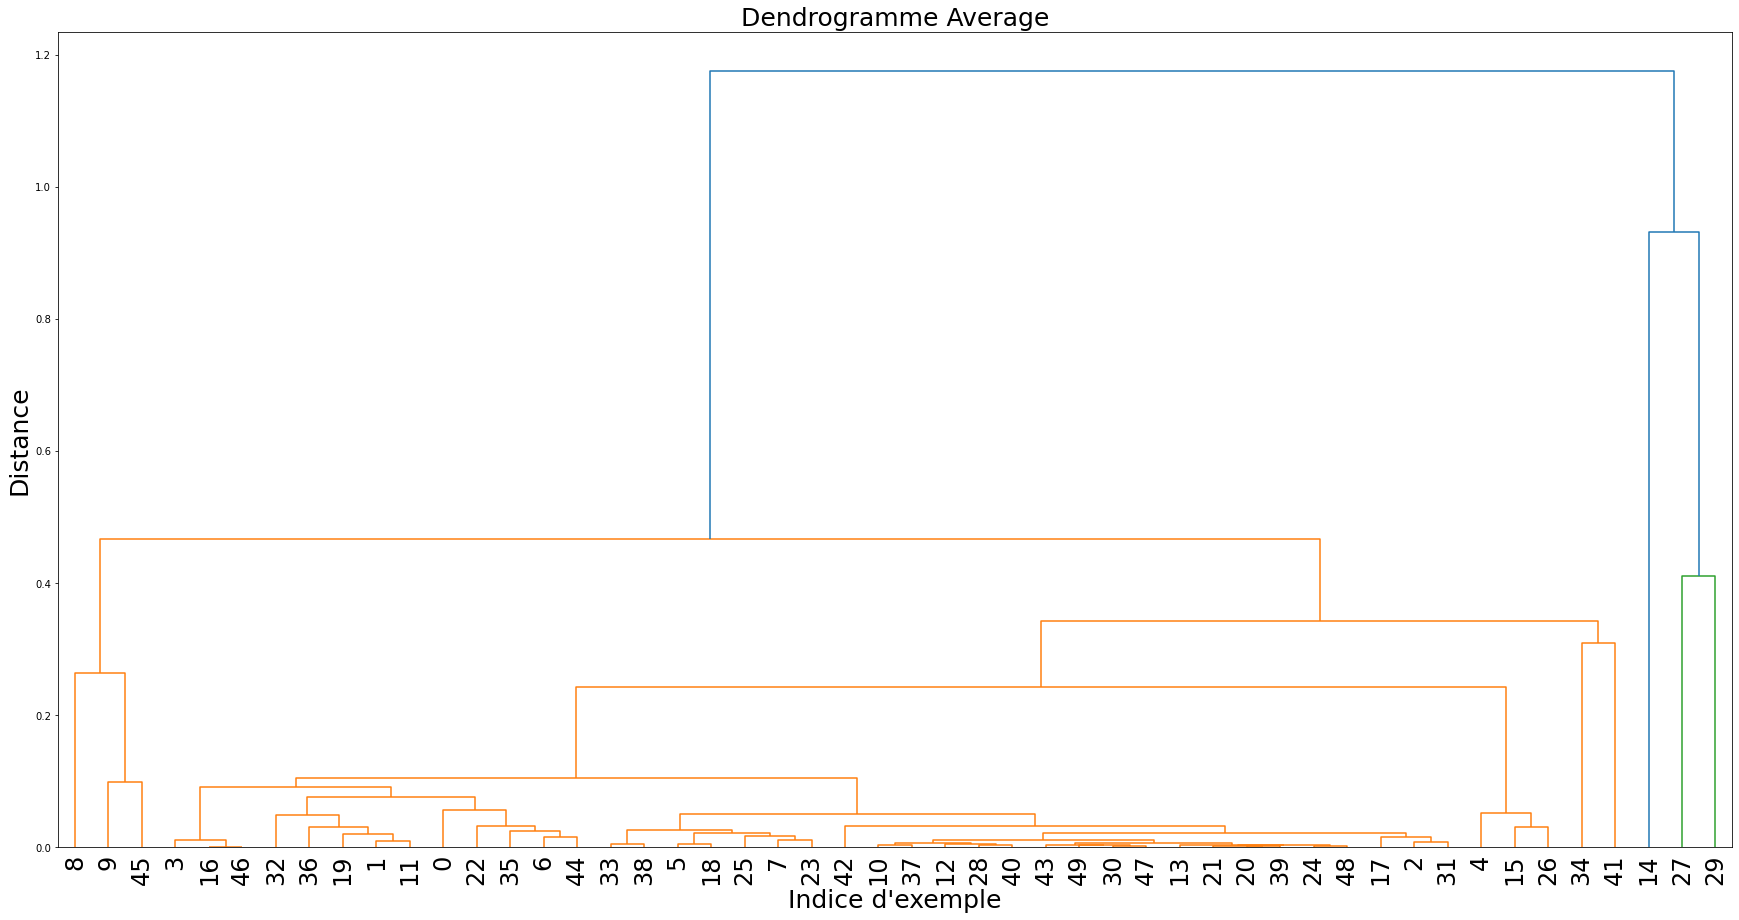

In [49]:
# Calcul du average CHA 
dend_average=clust.CHA_average(X_sample_norm)
print("dend=",dend_average)

# Paramètres de la fenêtre d'affichage
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme Average', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering
sc.dendrogram(
    dend_average, 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu
plt.show()


dend= [[16, 46, 0.0, 2], [20, 39, 0.001338123100134936, 2], [24, 48, 0.0018627169965077033, 2], [21, 51, 0.002212624014112696, 3], [30, 47, 0.0024389591901129407, 2], [49, 54, 0.0029022169780453288, 3], [28, 40, 0.003445704986633763, 2], [13, 53, 0.003489132906239981, 4], [10, 37, 0.0036122280620620923, 2], [43, 55, 0.0046411832352500435, 4], [52, 57, 0.0046520962325814225, 6], [5, 18, 0.004826961187171145, 2], [33, 38, 0.005246477330496954, 2], [12, 56, 0.005784639644201694, 3], [2, 58, 0.007655551148577869, 3], [59, 63, 0.00913602132375637, 7], [1, 11, 0.009535146770135967, 2], [3, 50, 0.011378347699071194, 3], [7, 23, 0.011480447484343173, 2], [31, 64, 0.011644463330892368, 4], [60, 65, 0.01409160093003531, 13], [6, 44, 0.01530330168069168, 2], [25, 68, 0.01703059946003834, 3], [19, 66, 0.02235998316370462, 3], [17, 62, 0.02276490279987364, 3], [35, 71, 0.02637115149038296, 3], [69, 70, 0.027708488533871076, 17], [15, 26, 0.030794656950009866, 2], [61, 72, 0.0322306540040259, 5], [3

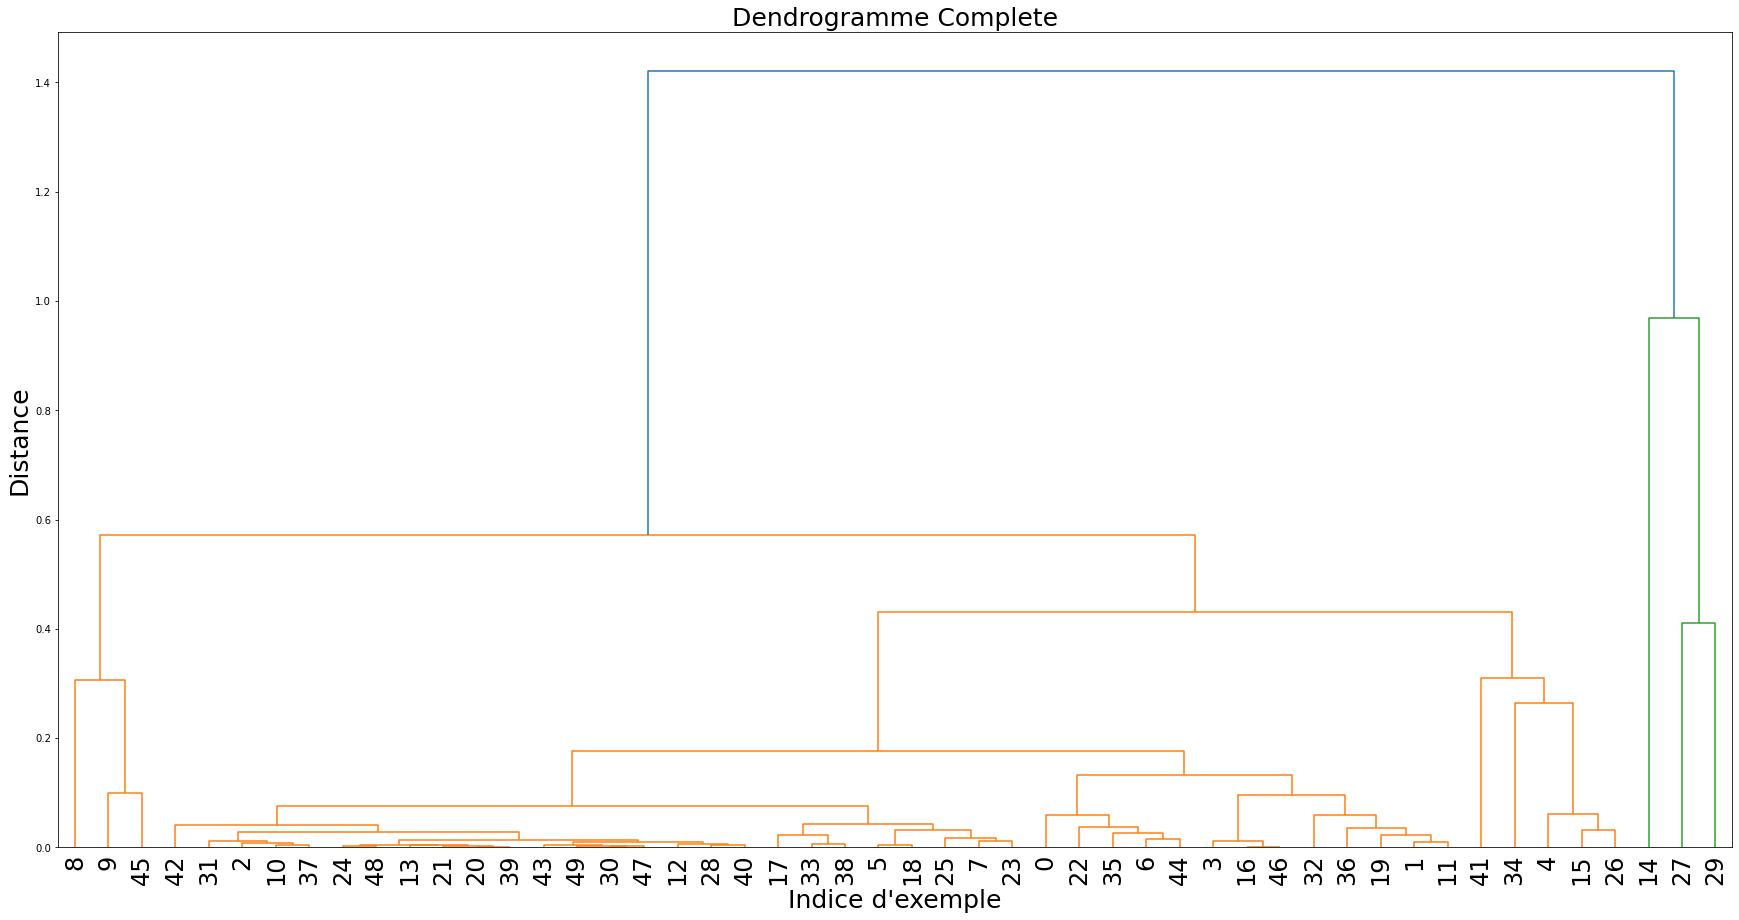

In [50]:
# Calcul du complete CHA 
dend_complete=clust.CHA_complete(X_sample_norm)
print("dend=",dend_complete)

# Paramètres de la fenêtre d'affichage
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme Complete', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering
sc.dendrogram(
    dend_complete, 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu
plt.show()


dend= [[16, 46, 0.0, 2], [20, 39, 0.001338123100134936, 2], [21, 51, 0.0013507000286755537, 3], [24, 48, 0.0018627169965077033, 2], [52, 53, 0.002401170325940364, 5], [30, 47, 0.0024389591901129407, 2], [54, 55, 0.0024588806510968363, 7], [13, 56, 0.002562499555130708, 8], [49, 57, 0.0025871959329017316, 9], [43, 58, 0.002914870601793446, 10], [28, 40, 0.003445704986633763, 2], [10, 37, 0.0036122280620620923, 2], [60, 61, 0.004633381813406386, 4], [5, 18, 0.004826961187171145, 2], [59, 62, 0.004867405729184052, 14], [33, 38, 0.005246477330496954, 2], [12, 64, 0.005302930668323604, 15], [2, 66, 0.007005326092209025, 16], [31, 67, 0.007876411234379111, 17], [1, 11, 0.009535146770135967, 2], [3, 50, 0.011378347699071194, 3], [7, 23, 0.011480447484343173, 2], [63, 71, 0.01200050582458615, 4], [17, 68, 0.014155634474957202, 18], [6, 44, 0.01530330168069168, 2], [25, 72, 0.016304368853362648, 5], [65, 73, 0.017522831867610687, 20], [19, 69, 0.018070495176757906, 3], [75, 76, 0.01939353735582

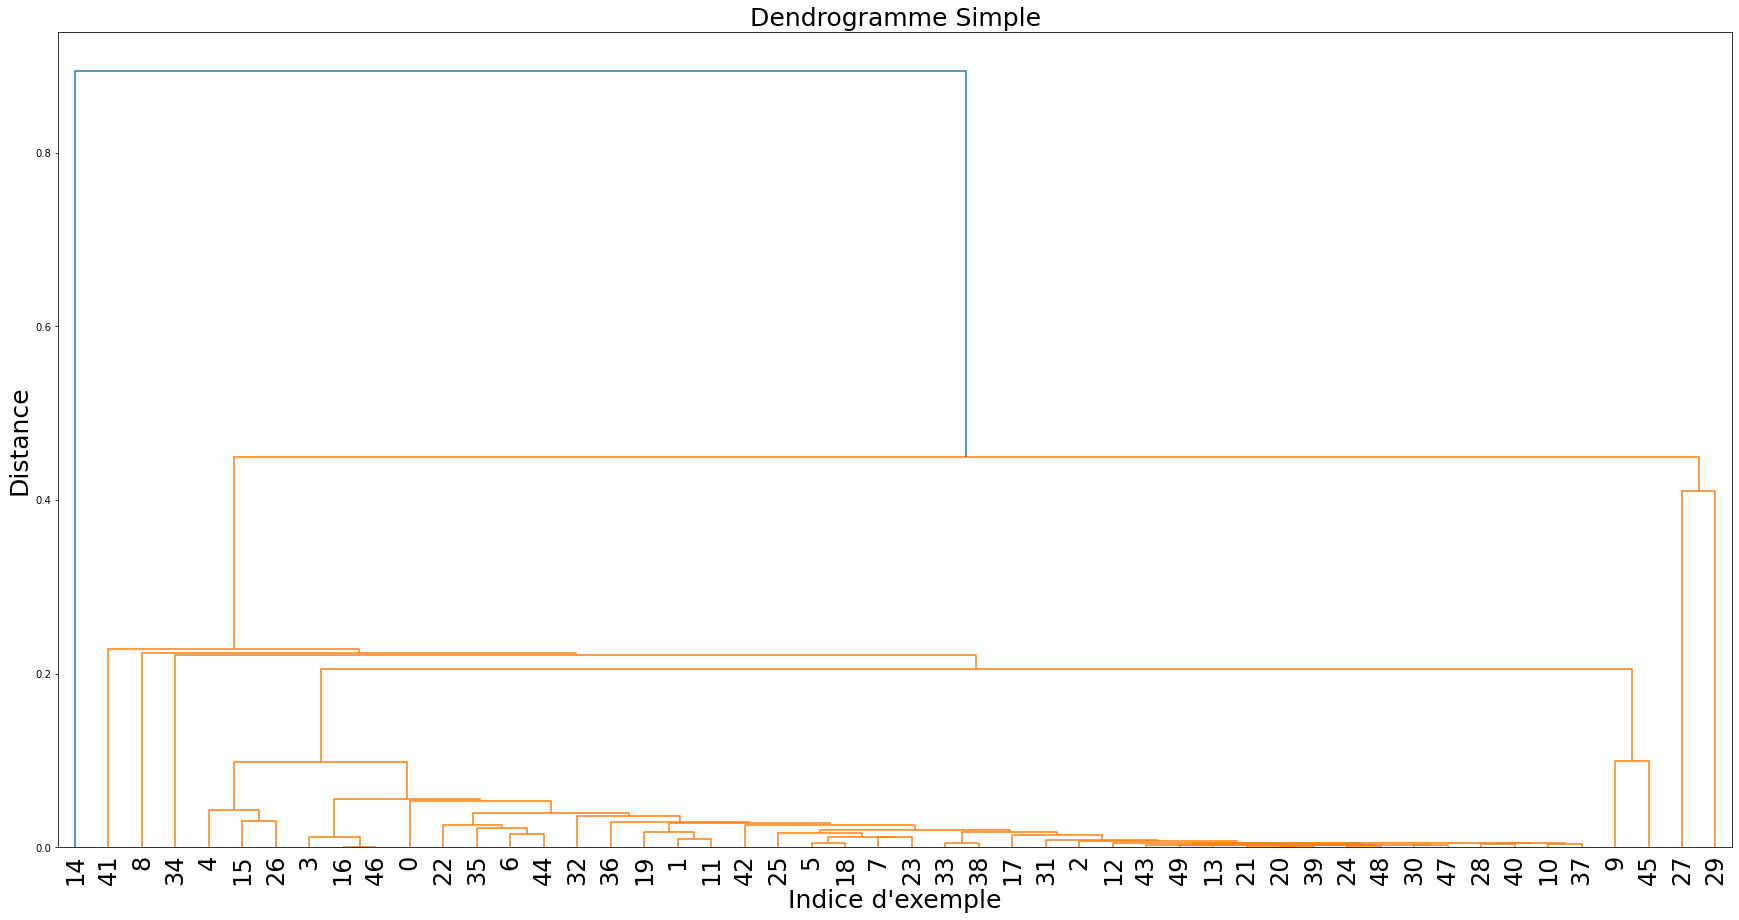

In [51]:
# Calcul du simple CHA 
dend_simple=clust.CHA_simple(X_sample_norm)
print("dend=",dend_simple)

# Paramètres de la fenêtre d'affichage
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme Simple', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering
sc.dendrogram(
    dend_simple, 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu
plt.show()


Nous pouvons remarquer que les dendrogrammes sont différents pour un meme échantillon. Ce qui est normal au vu des différents calculs de distance utilisés. Nous pouvons néanmoins remarquer certaines ressemblances. La forme des dendrogrammes est fortement liée à l'échantillon de données qu'on tire alétaoirment au début.  

A partir de l'affichage des dendrogrammes, nous considérons l'un d'eux (centroide dans notre cas) et nous choisissons le seuil de coupure que nous jugeons pertinent pour mettre en évidenc les groupes.  

Boite 6 : Choix du seuil et coupure

In [52]:
from scipy.cluster.hierarchy import cut_tree

#Choix du seuil de coupure et Affichage du nombre de groupes
seuil=0.5
groups=cut_tree(dend_centroid,height=seuil) #groups est une liste des groupes de chaque elem apparaissant dans le dendro
nb_groups=len(np.unique(groups))
print("au seuil ",seuil," il y a ",nb_groups," groupes distincts")

#construction du dictionnaire qui associe le numero de groupe aux indices des aliments qui appartiennet au groupe
dico_CHA= {key: [] for key in np.unique(groups)}
for i, group in enumerate(groups):
    dico_CHA[group[0]].append(d[i])

au seuil  0.5  il y a  3  groupes distincts


Boite 7 : Construction du dictionnaire dico_ecolo qui associe à chaque groupe la moyenne des impacts environnementaux des aliments qui en font partie et affichage des aliments de chaque groupe

In [53]:
dico_ecolo=dict()

# Affichage des groupes et contruction du dictionnaire dico_ecolo
for group_num, group_elems in dico_CHA.items():
    
    moy_chang_clim,moy_ozone,moy_part_fine=X_frame.iloc[group_elems].values.mean(0)
    moy_globale=clust.normalisation(X_frame.iloc[group_elems]).values.mean()
    moy_chang_clim,moy_ozone,moy_part_fine,moy_globale="{:.3e}".format(moy_chang_clim),"{:.3e}".format(moy_ozone),"{:.3e}".format(moy_part_fine),"{:.3e}".format(moy_globale)
    dico_ecolo[group_num]=(moy_chang_clim,moy_ozone,moy_part_fine,moy_globale)
    
    print(f"Groupe {group_num} (moy_chang={(dico_ecolo[group_num])[0]},moy_ozone={(dico_ecolo[group_num])[1]},moy_part={(dico_ecolo[group_num])[2]},moy_globale={(dico_ecolo[group_num])[3]}) :")
    for elem in group_elems:
        print(f"\t- {data_synthese.iloc[elem, 4]}")  # 4 est l'indice de la colonne nom produit 
    print()




Groupe 0 (moy_chang=5.066e+00,moy_ozone=3.323e-07,moy_part=3.990e-07,moy_globale=1.507e-01) :
	- Boeuf aux carottes
	- Oignon, cru
	- Chips de pommes de terre, standard
	- Galette des rois feuilletée, fourrée frangipane, et Pithiviers
	- Eau minérale St-Antonin, embouteillée, non gazeuse, fortement minéralisée (St-Antonin-Noble-Val, 82)
	- Biscuit sec fourré fruits à coque (non ou légèrement chocolaté)
	- Concombre, pulpe, cru
	- Lait de chèvre, entier, cru
	- Café, non instantané, non sucré, prêt à boire
	- Pâtes sèches, au blé complet, crues
	- Ananas au sirop léger, appertisé, non égoutté
	- Tapioca ou Perles du Japon, cru
	- Pizza au chèvre et lardons
	- Escalope végétale ou steak à base de soja
	- Eau minérale Levissima, embouteillée, non gazeuse, faiblement minéralisée (Italie)
	- Pain pour hamburger ou hot dog (bun), préemballé
	- Pavot, graine
	- Roquette, crue
	- Salade verte, crue, sans assaisonnement
	- Pizza aux légumes ou Pizza 4 saisons
	- Taboulé ou Salade de couscous, p

Boite 8 : Sélection du groupe d'aliments le plus écologique

In [54]:
l= np.array( [ (dico_ecolo[num])[3] for num in np.unique(groups) ] )
print("le numero du groupe le plus ecologique (moyenne d'impact minimale) est: ", l.argmin())

le numero du groupe le plus ecologique (moyenne d'impact minimale) est:  0


Partie 2/ K-mean : On applique cet algorithme sur tous les exemples de la base de donnés qui respectent la contrainte("DQR" <= 3) et nous essayons de trouver le cluster le plus éco-responsable

Boite 1 : Construction du dataFrame

In [55]:
# Colonnes à considérer dans le dataframe
colonnes = ["Changement climatique", "Appauvrissement de la couche d'ozone", "Particules fines"]

# Sélection des lignes du dataframe où la colonne "DQR" est inférieure ou égale à 3
X_frame = data_synthese[data_synthese["DQR"] <= 3][colonnes]

# Normalisation des valeurs dans X_frame
X_frame_norm = clust.normalisation(X_frame)

Boite 2 : Implémentation du K-mean et Recherche du meilleur k dans l'intervalle (2,20) en utilisant l'index de Dunn

In [56]:
# Initialisation des variables pour trouver la meilleure valeur de k
min_dunn = 100000
best_k = 1

# Boucle pour tester différentes valeurs de k
for k in range(2, 20):
    # Application de l'algorithme des k-moyennes avec la valeur de k courante
    centres, affectations = clust.kmoyennes(k, X_frame_norm, 0.05, 2000)
    
    # Calcul de l'indice de Dunn pour évaluer la qualité de la partition obtenue
    indice_dunn = clust.index_dunn(X_frame_norm, affectations)
    
    # Mise à jour de la meilleure valeur de k et de l'indice de Dunn minimum
    if indice_dunn < min_dunn:
        best_k = k
        min_dunn = indice_dunn

# Affichage de la meilleure valeur de k et de l'indice de Dunn correspondant
print("Meilleur k :", best_k)
print("Indice de Dunn minimum :", min_dunn)

# Application de l'algorithme des k-moyennes avec la meilleure valeur de k
best_centres, best_affect = clust.kmoyennes(best_k, X_frame_norm, 0.05, 2000)


Meilleur k : 16
Indice de Dunn minimum : 1.593436710034772e-308


Boite 3 : Affichage des clusters et construction du dico_kmean

In [57]:
#nombre d'exemples à afficher pour chaque cluster
nb_affichage=3 
#dictionnaire qui associe à chaque cluster le sous-groupe majoritaire correspondant
dico_kmean=dict()

#itère sur les clusters
for num_clust, indices in best_affect.items():
    frame_nom = data_synthese.iloc[indices, 4] # 4 indice de la colonne nom aliment 
    frame_sgroupe = data_synthese.iloc[indices, 3] # 3 indice du sous-groupe
    dico_kmean[num_clust]=frame_sgroupe.value_counts().idxmax()
    
    print("Cluster:", num_clust)
    print("Taille:", len(frame_nom))
    print("Noms associés:", ", ".join(frame_nom.head(nb_affichage).values))
    print("Sous-groupe alimentaire majoritaire:")
    print("   - Nom:",dico_kmean[num_clust] )
    print("   - Pourcentage:", "{:.2f}%".format((frame_sgroupe.value_counts().max() / len(frame_sgroupe)) * 100))
    print("~~~~~~")


Cluster: 0
Taille: 108
Noms associés: Ao-nori (Enteromorpha sp.), séchée ou déshydratée, Cannelle, poudre, Carvi, graine
Sous-groupe alimentaire majoritaire:
   - Nom: légumes
   - Pourcentage: 16.67%
~~~~~~
Cluster: 1
Taille: 72
Noms associés: Romarin, séché, Sauce béchamel, maison, Sauce bourguignonne, préemballée
Sous-groupe alimentaire majoritaire:
   - Nom: gâteaux et pâtisseries
   - Pourcentage: 23.61%
~~~~~~
Cluster: 2
Taille: 29
Noms associés: Tome des Bauges, Tomme ou tome de montagne ou de Savoie, Tomme ou tome de vache
Sous-groupe alimentaire majoritaire:
   - Nom: produits laitiers frais et assimilés
   - Pourcentage: 41.38%
~~~~~~
Cluster: 3
Taille: 71
Noms associés: Eau minérale Ventadour, embouteillée, gazeuse, faiblement minéralisée (Le Pestrin, 07), Eau minérale Vernet, embouteillée, gazeuse, faiblement minéralisée (Prades, 07), Beignet de légumes
Sous-groupe alimentaire majoritaire:
   - Nom: huiles et graisses végétales
   - Pourcentage: 23.94%
~~~~~~
Cluster: 4
Tai

Boite 4 : Analyse des moyennes des indicateurs environnementaux de chaque cluster

In [58]:
import sys

l_moy=[] # Liste pour stocker les moyennes de chaque variable

# Obtention des valeurs minimale et maximale possibles pour un float
min_valeur = sys.float_info.min
max_valeur = sys.float_info.max

moy_ch = max_valeur  # Initialisation de la moyenne du changement climatique avec une valeur maximale possible
i_moy_ch = 0  # Index du cluster avec la moyenne la plus faible pour le changement climatique

moy_oz = max_valeur  # Initialisation de la moyenne de la couche d'ozone avec une valeur maximale possible
i_moy_oz = 0  # Index du cluster avec la moyenne la plus faible pour la couche d'ozone

moy_part = max_valeur  # Initialisation de la moyenne des particules fines avec une valeur maximale possible
i_moy_part = 0  # Index du cluster avec la moyenne la plus faible pour les particules fines
#######################################################################################################
moy_ch1 = min_valeur  # Initialisation de la moyenne du changement climatique avec une valeur minimale possible
i_moy_ch1 = 0  # Index du cluster avec la moyenne la plus élevée pour le changement climatique

moy_oz1 = min_valeur  # Initialisation de la moyenne de la couche d'ozone avec une valeur minimale possible
i_moy_oz1 = 0  # Index du cluster avec la moyenne la plus élevée pour la couche d'ozone

moy_part1 = min_valeur  # Initialisation de la moyenne des particules fines avec une valeur minimale possible
i_moy_part1 = 0  # Index du cluster avec la moyenne la plus élevée pour les particules fines

l_moy_gen = []  # Liste pour stocker les moyennes générales

# Parcours des éléments du dictionnaire best_affect contenant les clusters et leurs indices
for (num_clust, indices) in best_affect.items():
    moy_chang_clim, moy_ozone, moy_part_fine = X_frame.iloc[indices].values.mean(0)
    l_moy.append((moy_chang_clim, moy_ozone, moy_part_fine))
    
    moy = np.mean(np.array(X_frame_norm.iloc[indices]))
    l_moy_gen.append(moy)
    

    # Recherche de la moyenne minimale pour chaque variable et mise à jour des index correspondants
    if moy_chang_clim < moy_ch:
        i_moy_ch = num_clust
        moy_ch = moy_chang_clim
    if moy_ozone < moy_oz:
        i_moy_oz = num_clust
        moy_oz = moy_ozone
    if moy_part_fine < moy_part:
        i_moy_part = num_clust
        moy_part=moy_part_fine

    # Recherche de la moyenne maximale pour chaque variable et mise à jour des index correspondants
    if moy_chang_clim > moy_ch1:
        i_moy_ch1 = num_clust
        moy_ch1 = moy_chang_clim
    if moy_ozone > moy_oz1:
        i_moy_oz1 = num_clust
        moy_oz1 = moy_ozone
    if moy_part_fine > moy_part1:
        i_moy_part1=num_clust
        moy_part1=moy_part_fine

#calcul des indices des clusters qui ont le min / max de la moyenne generale
min_moy_gen = np.argmin(np.array(l_moy_gen))
max_moy_gen = np.argmax(np.array(l_moy_gen))


Boite 5 : Affichage des moyennes et des clusters correspondants

In [59]:
print("Cluster ayant la moyenne la plus faible pour chaque variable :")
print("\tChangement climatique (min) ---> Cluster", i_moy_ch, "\t\tMoyenne : {:.2f}".format(moy_ch))
print("\tCouche d'ozone (min) -      ---> Cluster", i_moy_oz, "\t\tMoyenne : {:.2f}".format(moy_oz))
print("\tParticules fines (min)      ---> Cluster", i_moy_part, "\t\tMoyenne : {:.2f}".format(moy_part))
print("\nCluster ayant la moyenne la plus élevée pour chaque variable :")
print("\tChangement climatique (max) ---> Cluster", i_moy_ch1, "\t\tMoyenne : {:.2f}".format(moy_ch1))
print("\tCouche d'ozone (max)        ---> Cluster", i_moy_oz1, "\t\tMoyenne : {:.2f}".format(moy_oz1))
print("\tParticules fines (max)      ---> Cluster", i_moy_part1, "\t\tMoyenne : {:.2f}".format(moy_part1))
print("\nCluster ayant la moyenne générale la plus faible : Cluster", min_moy_gen, "\tMoyenne générale : {:.2f}".format(l_moy_gen[min_moy_gen]))
print("Cluster ayant la moyenne générale la plus élevée : Cluster", max_moy_gen, "\tMoyenne générale : {:.2f}".format(l_moy_gen[max_moy_gen]))


Cluster ayant la moyenne la plus faible pour chaque variable :
	Changement climatique (min) ---> Cluster 4 		Moyenne : 0.42
	Couche d'ozone (min) -      ---> Cluster 11 		Moyenne : 0.00
	Particules fines (min)      ---> Cluster 4 		Moyenne : 0.00

Cluster ayant la moyenne la plus élevée pour chaque variable :
	Changement climatique (max) ---> Cluster 2 		Moyenne : 45.66
	Couche d'ozone (max)        ---> Cluster 13 		Moyenne : 0.00
	Particules fines (max)      ---> Cluster 2 		Moyenne : 0.00

Cluster ayant la moyenne générale la plus faible : Cluster 4 	Moyenne générale : 0.00
Cluster ayant la moyenne générale la plus élevée : Cluster 2 	Moyenne générale : 0.57


Boite 6-7-8-9 : représentation des pourcentages d'impacts environnementaux des différents clusters sous forme d'un graphe circulaire ( le cluster ayant le plus petit pourcentage pour l'impact considéré est mis en évidence)

Boite 6 -> Changement climatique / Boite 7 -> Couche d'ozone / Boite 8 -> Particules fines / Boite 9 -> sur les trois


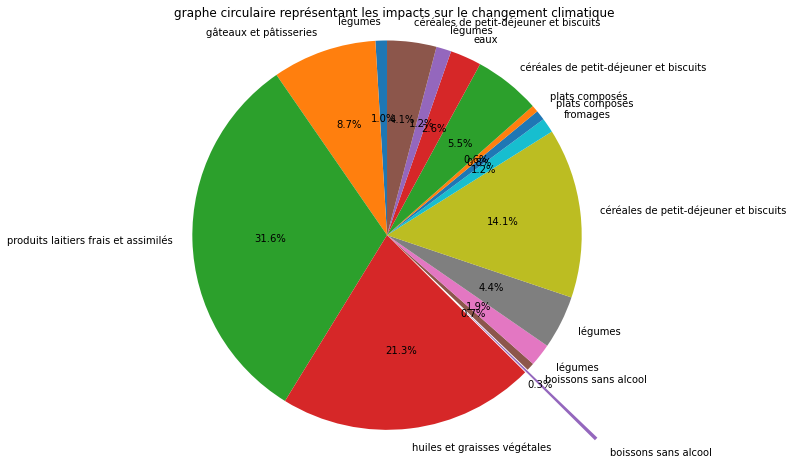

In [60]:
import matplotlib.colors as colors

# Données pour les secteurs du graphe circulaire
labels = []
sizes = []
for k in range(best_k):
    labels.append(dico_kmean[k])
    sizes.append(l_moy[k][0])



# Générer une liste de couleurs avec une graduation
colors = list(colors.TABLEAU_COLORS.values())[:best_k]
explode = (0,)*best_k
l=list(explode)
l[min_moy_gen]=0.5 # Pour faire ressortir une part du graphe
explode=tuple(l)

# Créer une figure et des axes avec une taille personnalisée
fig, ax = plt.subplots(figsize=(8, 8))

# Dessin du graphe circulaire
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',  normalize=True,startangle=90)

# Ajouter un titre
plt.title("graphe circulaire représentant les impacts sur le changement climatique")

# Afficher le graphe
plt.axis('equal')  # Pour s'assurer que le graphe est circulaire
plt.show()

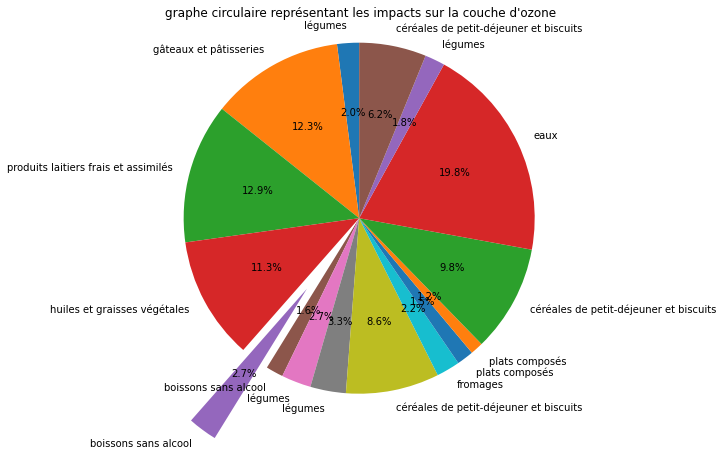

In [61]:
import matplotlib.colors as colors

# Données pour les secteurs du graphe circulaire
labels = []
sizes = []
for k in range(best_k):
    labels.append(dico_kmean[k])
    sizes.append(l_moy[k][1])




# Générer une liste de couleurs avec une graduation
colors = list(colors.TABLEAU_COLORS.values())[:best_k]
explode = (0,)*best_k
l=list(explode)
l[min_moy_gen]=0.5 # Pour faire ressortir une part du graphe
explode=tuple(l)

# Créer une figure et des axes avec une taille personnalisée
fig, ax = plt.subplots(figsize=(8, 8))

# Dessin du graphe circulaire
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',  normalize=True,startangle=90)

# Ajouter un titre
plt.title("graphe circulaire représentant les impacts sur la couche d'ozone")

# Afficher le graphe
plt.axis('equal')  # Pour s'assurer que le graphe est circulaire
plt.show()

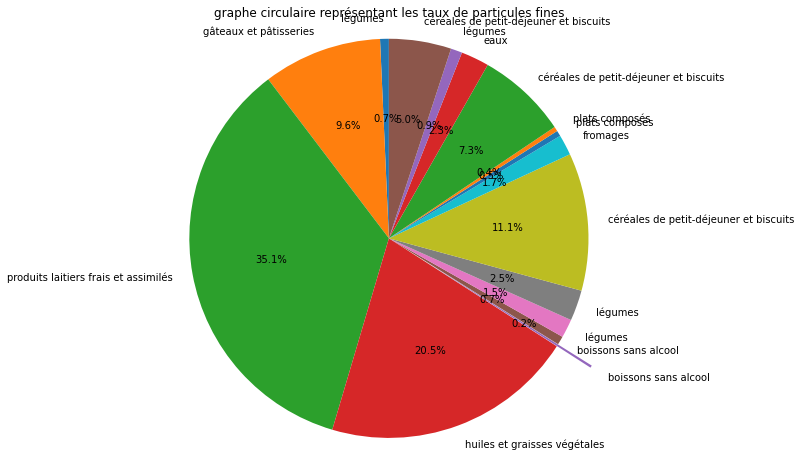

In [62]:
import matplotlib.colors as colors

# Données pour les secteurs du graphe circulaire
labels = []
sizes = []
for k in range(best_k):
    labels.append(dico_kmean[k])
    sizes.append(l_moy[k][2])




# Générer une liste de couleurs avec une graduation
colors = list(colors.TABLEAU_COLORS.values())[:best_k]
explode = (0,)*best_k
l=list(explode)
l[min_moy_gen]=0.2 # Pour faire ressortir une part du graphe
explode=tuple(l)

# Créer une figure et des axes avec une taille personnalisée
fig, ax = plt.subplots(figsize=(8, 8))

# Dessin du graphe circulaire
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', normalize=True,startangle=90)

# Ajouter un titre
plt.title('graphe circulaire représentant les taux de particules fines')

# Afficher le graphe
plt.axis('equal')  # Pour s'assurer que le graphe est circulaire
plt.show()

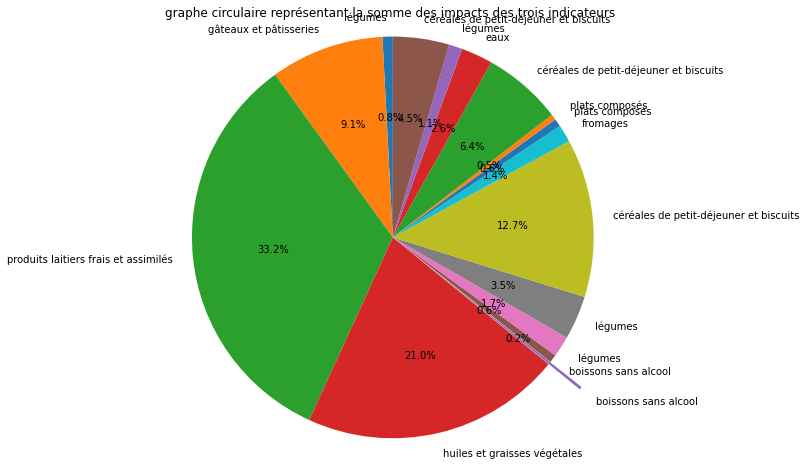

In [63]:
import matplotlib.colors as colors

# Données pour les secteurs du graphe circulaire
labels = []
sizes = []
for k in range(best_k):
    labels.append(dico_kmean[k])
    sizes.append(l_moy_gen[k])




# Générer une liste de couleurs avec une graduation
colors = list(colors.TABLEAU_COLORS.values())[:best_k]
explode = (0,)*best_k
l=list(explode)
l[min_moy_gen]=0.2 # Pour faire ressortir une part du graphe
explode=tuple(l)

# Créer une figure et des axes avec une taille personnalisée
fig, ax = plt.subplots(figsize=(8, 8))

# Dessin du graphe circulaire
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', normalize=True,startangle=90)

# Ajouter un titre
plt.title("graphe circulaire représentant la somme des impacts des trois indicateurs ")

# Afficher le graphe
plt.axis('equal')  # Pour s'assurer que le graphe est circulaire
plt.show()

Boite 10 : Affichage du cluster plus écologique

In [64]:
indices = best_affect[min_moy_gen]
frame_nom = data_synthese.iloc[indices, 4]
frame_sgroupe = data_synthese.iloc[indices, 3]

print("Le cluster le plus écologique :")
print("Cluster", min_moy_gen)
print("Taille         :", len(frame_nom))
print("Noms associés  :", ", ".join(frame_nom.head(nb_affichage).values))
print("Sous-groupe alimentaire majoritaire :")
print("   - Nom       :", frame_sgroupe.value_counts().idxmax())
print("   - Pourcentage :", "{:.2f}%".format((frame_sgroupe.value_counts().max() / len(frame_sgroupe)) * 100))


Le cluster le plus écologique :
Cluster 4
Taille         : 189
Noms associés  : Base de pizza tomatée, Sauce aïoli, préemballée, Sauce américaine, préemballée
Sous-groupe alimentaire majoritaire :
   - Nom       : boissons sans alcool
   - Pourcentage : 16.93%


Conclusion Problématique 1 : Nous avons réussi à montrer que nos modèles d'apprentissage non-supervisés permettent de construire des groupes qui ont des caractéristiques environnementales proches. Grace à quoi on a pu isoler le groupe qui a des valeurs faibles pour les indicateurs et donc le plus éco-responsable

Problématique 2 : Peut-on prédire l'appartenance d'un aliment à un groupe?

Pour cela, nous allons utiliser les algorithmes d'apprentissage supervisés (knn et arbre de décision).

Partie1/ KNN : Nous repartons de la base "X_frame_norm" construite précedemment qui contient les vecteurs de description [Changement climatique, 	Appauvrissement de la couche d'ozone, Particules fines] normalisés et nous choisissons comme label la colonne "Groupe d'aliment". 

In [65]:
# Colonnes à considérer dans le dataframe
colonnes = ["Changement climatique", "Appauvrissement de la couche d'ozone", "Particules fines"]

# Sélection des lignes du dataframe où la colonne "DQR" est inférieure ou égale à 3
X_frame = data_synthese[data_synthese["DQR"] <= 3]

# Normalisation des valeurs dans X_frame
X_frame_norm = clust.normalisation(X_frame[colonnes])

Boite 1: Transfomation des données catégorielles de la colonne "Groupe d'aliment" en données numériques

In [66]:
import numpy as np

# Conversion de X_frame_norm en un tableau NumPy
X = np.array(X_frame_norm)

# Calcul des étiquettes uniques et de leurs fréquences dans la colonne 2 de data_synthese

Y_temp, counts = np.unique(X_frame.iloc[:, [2]], return_counts=True)

# Dictionnaire pour transformer les valeurs catégorielles de Y en valeurs numériques
Y_numerique = dict()
label = 0

# Dictionnaire pour transformer les valeurs numériques de Y en valeurs catégorielles
Y_categoriel = dict()

Y = []  # Liste des labels numériques

# Parcours des étiquettes uniques et de leurs fréquences
for nom_gr in Y_temp:
    Y_numerique[nom_gr] = label  # Assigner une valeur numérique à chaque étiquette
    Y.extend([label] * counts[label])  # Ajouter des éléments à Y en fonction de leur fréquence
    Y_categoriel[label] = nom_gr  # Associer une valeur numérique à chaque étiquette
    label += 1

# Affichage des correspondances entre les étiquettes catégorielles et numériques
for (cat, num) in Y_numerique.items():
    print(cat, "---->", num)

# Affichage de la liste Y contenant les labels numériques
Y=np.array(Y)
print("\nY =", Y)


aides culinaires et ingrédients divers ----> 0
aliments infantiles ----> 1
boissons ----> 2
entrées et plats composés ----> 3
fruits, légumes, légumineuses et oléagineux ----> 4
glaces et sorbets ----> 5
lait et produits laitiers ----> 6
matières grasses ----> 7
produits céréaliers ----> 8
produits sucrés ----> 9
viandes, œufs, poissons ----> 10

Y = [ 0  0  0 ... 10 10 10]


Le code ci-dessus suffit pour assurer la correspondance entre X et Y parce que les aliments dans la base sont regroupés par blocs et triés en fonction du groupe d'aliment. Pour s'en convaincre, on a rajouté les deux boites suivantes:

In [67]:
#on introduit un dictionnaire qui relie les indices de X_frame_norm aux indices de la matrice de description X

dico_indices=dict()
ind=0
for i in X_frame_norm.index.tolist():
    dico_indices[i]=ind
    ind+=1



In [68]:
#Vérification
count=len(X_frame_norm)
for (ind_base,ind_X) in dico_indices.items():
    gr_base=data_synthese.iloc[ind_base,2]
    gr_X=Y_categoriel[Y[ind_X]]
        
    if(gr_base==gr_X):
        count-=1
    
if(count==0):
    print("SUCCESS: CORRESPONDANCE ASSUREE")
else:
    print("ERREUR: REVOYEZ LE CODE")


SUCCESS: CORRESPONDANCE ASSUREE


Boite 2 : On applique le knn sur X et Y et on trouve le k-optimal avec la validation croisée

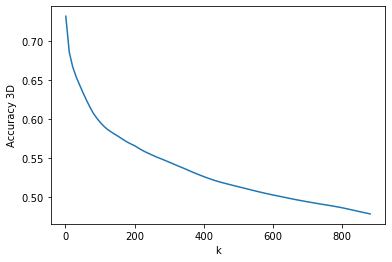

k optimal est  1


In [69]:
# on stocke les accuracies dans une liste :
accuracies_3D = []
# Liste pour stocker les taux de bonne classification à chaque itération
perf = []
# seuil max des valeurs de k à regarder:
seuil_k = len(X) // 2

#k_opt : valeur du k optimal
k_opt=0
#acc_max : accuracy max 
acc_max=0
#list_kop : liste des k optimaux pour chaque séparation du crossval
liste_kop=[]
# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1, seuil_k, 10)]

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

for k in valeurs_k:
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ev.crossval_strat(Xm, Ym, nb_iter, i)
        KNN_3D = cl.ClassifierKNN2(3, k) #ce classifier prend en compte des labels multi-classes
        KNN_3D.train(Xapp,Yapp)
        acc=(KNN_3D.accuracy(Xtest,Ytest))
        if(acc>acc_max):
            k_opt=k
            acc_max=acc
        
        perf.append(KNN_3D.accuracy(Xtest,Ytest))
    
    accuracies_3D.append(np.mean(perf))
    
# Tracer de la courbe des variations
plt.plot(valeurs_k, accuracies_3D)  
plt.ylabel('Accuracy 3D')
plt.xlabel("k")
plt.show()
print("k optimal est ",k_opt)

Boite 3 : Création du knn avec le k optimal et calculs d'accuracies

In [70]:
accuracies_opt=[]
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ev.crossval_strat(Xm, Ym, nb_iter, i)
    KNN_3D = cl.ClassifierKNN2(3, k_opt) #ce classifier prend en compte des labels multi-classes
    KNN_3D.train(Xapp,Yapp)
    acc=(KNN_3D.accuracy(Xtest,Ytest))
    accuracies_opt.append(acc)

print("L'accuracy maximale = ", round(np.max(accuracies_opt),3),"\nL'accuracy moyenne =",round(np.mean(accuracies_opt),3))

L'accuracy maximale =  0.807 
L'accuracy moyenne = 0.731


Notre classifieur a de bonnes performances. Il permet de pérdir le groupe alimentaire d'un aliment à partir des valeurs des indicateurs environnementaux.

Boite 4 : Exemple d'application : Nous donnons au KNN 10 indices d'aliments tirés aléatoirement et comparons le groupe renvoyé pour chaque aliment avec celui présent dans la base de données. 

In [71]:
nb_indices = 10
indices_aliments = random.sample(X_frame_norm.index.tolist(), nb_indices)
X = np.array(X_frame_norm)
indices_X = [dico_indices[i] for i in indices_aliments]

count = 0
for (ind_base, ind_X) in zip(indices_aliments, indices_X):
    classe = KNN_3D.predict(X[ind_X])
    print("\nL'aliment : ", data_synthese.iloc[ind_base, 4], "\n\tGroupe dans la base : ", 
          data_synthese.iloc[ind_base, 2], "\n\tClasse prédite : ",Y_categoriel[classe])
    if Y_categoriel[classe] == data_synthese.iloc[ind_base, 2]:
        count += 1

taux_reussite = count / nb_indices * 100
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nLe taux de réussite est de {taux_reussite:.2f}%")



L'aliment :  Biscuit sec, avec matière grasse végétale 
	Groupe dans la base :  produits céréaliers 
	Classe prédite :  produits céréaliers

L'aliment :  Tartiflette 
	Groupe dans la base :  entrées et plats composés 
	Classe prédite :  entrées et plats composés

L'aliment :  Porc, gorge, découennée, crue 
	Groupe dans la base :  viandes, œufs, poissons 
	Classe prédite :  viandes, œufs, poissons

L'aliment :  Saucisson à l'ail 
	Groupe dans la base :  viandes, œufs, poissons 
	Classe prédite :  viandes, œufs, poissons

L'aliment :  Falafel ou Boulette de pois-chiche et/ou fève, frite 
	Groupe dans la base :  entrées et plats composés 
	Classe prédite :  entrées et plats composés

L'aliment :  Boisson au soja, aromatisée, sucrée 
	Groupe dans la base :  boissons 
	Classe prédite :  boissons

L'aliment :  Bambou, pousse, crue 
	Groupe dans la base :  fruits, légumes, légumineuses et oléagineux 
	Classe prédite :  boissons

L'aliment :  Pomme, pulpe, bouillie/cuite à l'eau 
	Groupe dans

Partie 2/ Arbre de décision : Nous allons prendre un petit échantillon ( une dizaine de vecteurs de descriptions comme ceux utilisés précédmment) pour essayer de leur mettre des étiquettes (le groupe alimentaire) 

Boite 1 : Construction et Affichage de l'arbre 

accuracy= 1.0


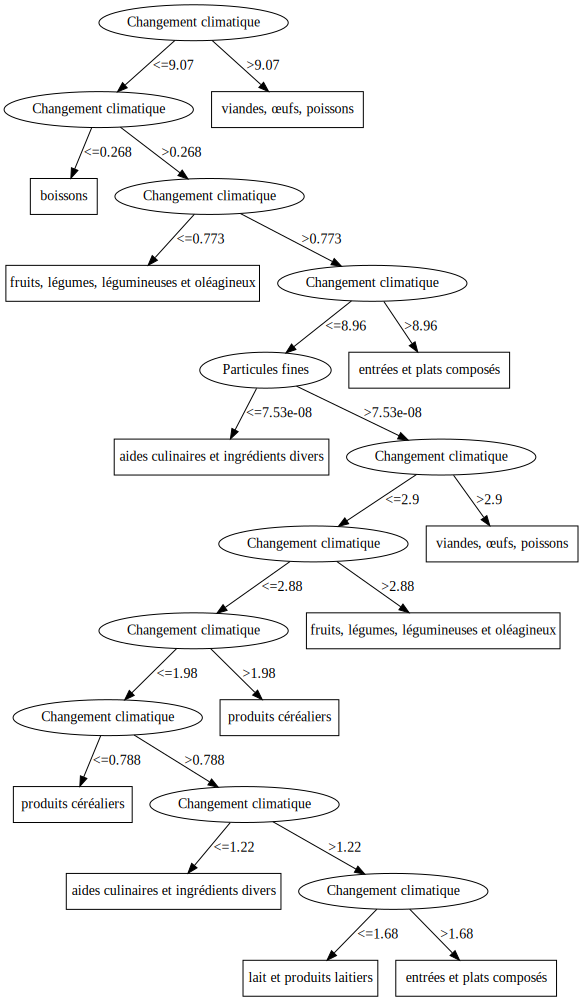

In [72]:
import scipy
import scipy.cluster.hierarchy as sc
import graphviz as gv
colonnes=["Changement climatique","Appauvrissement de la couche d'ozone","Particules fines"]
X_frame=data_synthese[data_synthese["DQR"]<=3]
nb_sample=20
indices=random.sample(range(len(X_frame)),nb_sample)
alim_desc=np.array((X_frame[colonnes].iloc[indices]))
alim_label=np.array(X_frame.iloc[indices,2])

alim_arbre=cl.ClassifierArbreNumerique(len(colonnes),0.0,colonnes)

alim_arbre.train(alim_desc,alim_label)
graphe_alim_arbre=gv.Digraph(format='png')
alim_arbre.affiche(graphe_alim_arbre)

# Sauvegarder l'image
graphe_alim_arbre.render("arbre", format='png')

print("accuracy=",alim_arbre.accuracy(alim_desc,alim_label))
graphe_alim_arbre




Boite 2 : Validation croisée de l'arbre

In [73]:
X_frame_norm = clust.normalisation(X_frame[colonnes])  # Normalisation des colonnes de X_frame
nb_indices = 100  # Nombre d'indices d'aliments à tester
indices_aliments = random.sample(X_frame_norm.index.tolist(), nb_indices)  # Échantillonnage aléatoire des indices d'aliments

Xm = np.array(data_synthese.iloc[indices_aliments][colonnes])  
Ym = data_synthese.iloc[indices_aliments, 2]  # 2 est l'indice de la colonne groupe d'aliment
Ym = np.array([Y_numerique[nom] for nom in Ym])  # Conversion des valeurs extraites en valeurs numériques

accuracies_opt = []  # Liste pour stocker les précisions des classifications

for i in range(nb_iter):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(Xm, Ym, nb_iter, i)  # Validation croisée des données Xm et Ym
    alim_arbre = cl.ClassifierArbreNumerique(len(colonnes), 0.0, colonnes)  # Création d'une instance de ClassifierArbreNumerique

    alim_arbre.train(Xapp, Yapp)  # Entraînement du classifieur alim_arbre avec les données d'apprentissage

    acc = alim_arbre.accuracy(Xtest, Ytest)  # Calcul de l'exactitude du classifieur sur les données de test
    accuracies_opt.append(acc)  # Ajout de l'exactitude à la liste accuracies_opt

print("L'accuracy maximale =", round(np.max(accuracies_opt), 3))  # Affichage de l'exactitude maximale
print("L'accuracy moyenne =", round(np.mean(accuracies_opt), 3))  # Affichage de l'exactitude moyenne


L'accuracy maximale = 0.8
L'accuracy moyenne = 0.547


Conclusion problématique 2 : Les modèles d'apprentissage supervisés que nous avons utilisés permettent de prédire le groupe alimentaire d'un aliment de la base en connaissant de ses indicateurs environnementaux. Ils présentent de bons taux de réussite.